In [1]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('data/msft_stockprices_dataset.csv')
dataset.head(10)

,Date,High Price,Low Price,Open Price,Close Price,Volume
0,2014-09-09 00:00:00,46.970001,46.419998,46.470001,46.759998,40302400.0
1,2014-09-10 00:00:00,46.939999,46.279999,46.820000,46.840000,27302400.0
2,2014-09-11 00:00:00,47.000000,46.470001,46.740002,47.000000,29216400.0
3,2014-09-12 00:00:00,47.020000,46.599998,46.910000,46.700001,38244700.0
4,2014-09-15 00:00:00,46.709999,46.099998,46.540001,46.240002,37667600.0
5,2014-09-16 00:00:00,46.849998,46.290001,46.389999,46.759998,27910600.0
6,2014-09-17 00:00:00,46.689999,46.230000,46.259998,46.520000,38311900.0
7,2014-09-18 00:00:00,46.830002,46.459999,46.590000,46.680000,35556600.0
8,2014-09-19 00:00:00,47.570000,46.599998,46.810001,47.520000,202522400.0
9,2014-09-22 00:00:00,47.380001,46.980000,47.299999,47.060001,38686100.0


In [48]:
used_features = ["High Price", "Low Price","Open Price","Volume"]

X = dataset[used_features].values 
Y = dataset["Close Price"].values 

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)# 按分割测试数据与训练数据

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)#用线性模型拟合训练数据

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
y_pred = regressor.predict(X_test) # 预测测试数据

In [53]:
print (regressor)
# 训练后模型截距
print (regressor.intercept_)
# 训练后模型权重（特征个数无变化）
print (regressor.coef_)
print(Y_test.size)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-0.004279378267497691
[ 7.95558571e-01  8.04885403e-01 -5.99383988e-01 -8.21800517e-10]
202


RMSE by hand: 0.3313964644176072


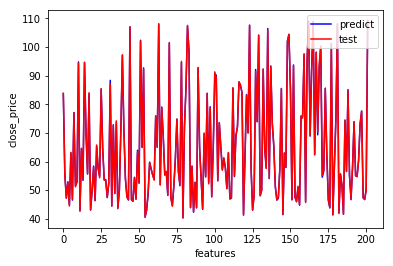

In [62]:
#模型评估
# 1)平均绝对误差(Mean Absolute Error, MAE)
# (2)均方误差(Mean Squared Error, MSE)
# (3)均方根误差(Root Mean Squared Error, RMSE)
# 这里我使用RMES。

import matplotlib.pyplot as plt

sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-Y_test[i])**2
total=Y_test.size
sum_erro=np.sqrt(sum_mean/total)  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),Y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("features")
plt.ylabel('close_price')
plt.show()

In [55]:
a = abs((y_pred-Y_test)/Y_test)

In [57]:
a[a<=0.1].size/total #错误容忍为10% 时的准确率

1.0

In [60]:
a[a<=0.05].size/total #错误容忍为5% 时的准确率

1.0

In [61]:
a[a<=0.01].size/total #错误容忍为5% 时的准确率

0.9554455445544554